In [2]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde

# Use the Solarize Light style globally
plt.style.use("Solarize_Light2")

# Set global parameters for black axes, labels, and grid
plt.rcParams['grid.color'] = 'white'               # Grid color
plt.rcParams['grid.linestyle'] = '--'              # Grid linestyle
plt.rcParams['grid.alpha'] = 0.7                   # Grid transparency
plt.rcParams['axes.edgecolor'] = 'black'           # Axis border color
plt.rcParams['axes.labelcolor'] = 'black'          # Axis label color
plt.rcParams['xtick.color'] = 'black'              # X-axis tick color
plt.rcParams['ytick.color'] = 'black'              # Y-axis tick color
plt.rcParams['text.color'] = 'black'               # Default text color, affects title color

In [64]:
atk2000_qoe_metrics = pd.read_csv("./150_qoe_atk2000_noids.csv").fillna(0)
atk500_qoe_metrics = pd.read_csv("./150_qoe_atk500_noids.csv").fillna(0)
atk100_qoe_metrics = pd.read_csv("./150_qoe_atk100_noids.csv").fillna(0)
atk50_qoe_metrics = pd.read_csv("./150_qoe_atk50_noids.csv").fillna(0)
atk0_qoe_metrics = pd.read_csv("./150_qoe_noatk_noids.csv")
atk0_qoe_metrics["media_loading_duration"] = atk0_qoe_metrics["media_loading_duration"].fillna(150000)
atk0_qoe_metrics["video_resolution"] = atk0_qoe_metrics["video_resolution"].fillna(0)

# Average Distribution

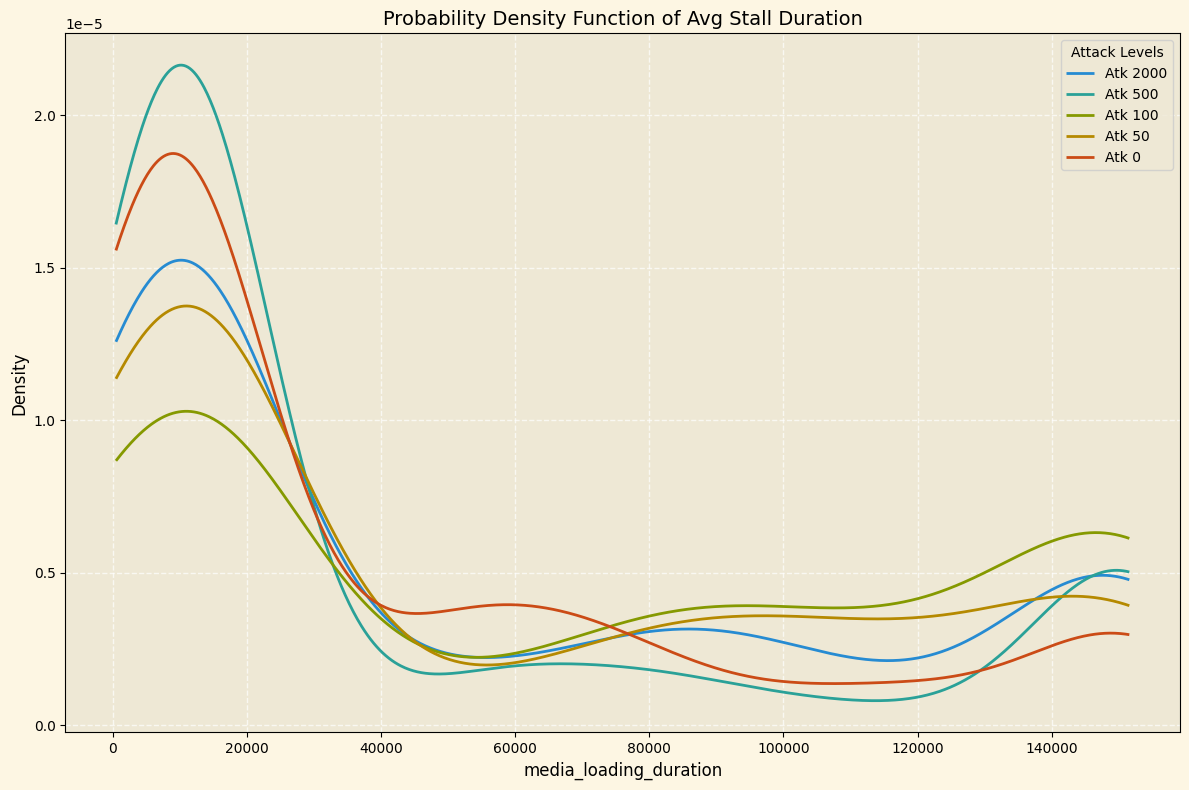

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load and preprocess datasets
cpu = 0.5


# Target metric
metric = "avg_stall_duration"
metric = "video_resolution"
metric = "media_loading_duration"

# KDE for each dataset to compute the PDF
atk2000_kde = gaussian_kde(atk2000_qoe_metrics[metric])
atk500_kde = gaussian_kde(atk500_qoe_metrics[metric])
atk100_kde = gaussian_kde(atk100_qoe_metrics[metric] )
atk50_kde = gaussian_kde(atk50_qoe_metrics[metric])
atk0_kde = gaussian_kde(atk0_qoe_metrics[metric])


# Define the range of x values based on the data
x_values = np.linspace(
    min(atk2000_qoe_metrics[metric].min(), atk500_qoe_metrics[metric].min(),
        atk100_qoe_metrics[metric].min(), atk50_qoe_metrics[metric].min()),
    max(atk2000_qoe_metrics[metric].max(), atk500_qoe_metrics[metric].max(),
        atk100_qoe_metrics[metric].max(), atk50_qoe_metrics[metric].max()),
    1000
)

# Plot the PDFs
plt.figure(figsize=(12, 8))
plt.plot(x_values, atk2000_kde(x_values), label="Atk 2000", linewidth=2)
plt.plot(x_values, atk500_kde(x_values), label="Atk 500", linewidth=2)
plt.plot(x_values, atk100_kde(x_values), label="Atk 100", linewidth=2)
plt.plot(x_values, atk50_kde(x_values), label="Atk 50", linewidth=2)
plt.plot(x_values, atk0_kde(x_values), label="Atk 0", linewidth=2)

# Add labels, legend, and title
plt.title("Probability Density Function of Avg Stall Duration", fontsize=14)
plt.xlabel(f"{metric}", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Attack Levels", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PDF
plt.tight_layout()

# Per CPU

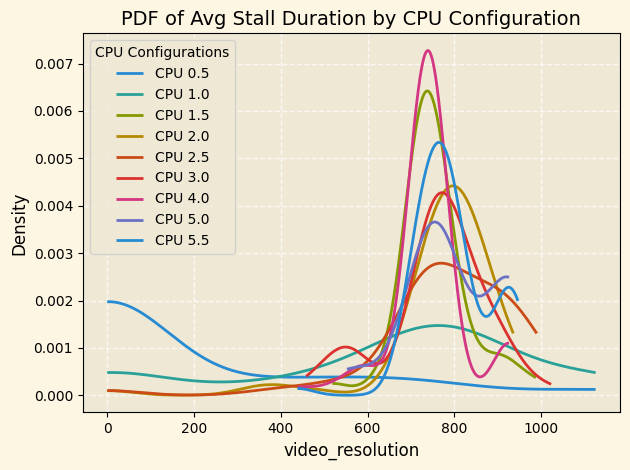

In [29]:
# Plot the KDE for each CPU configuration
metric = "video_resolution"
for cpu, group in atk0_qoe_metrics.groupby('cpu'):
    kde = gaussian_kde(group[metric])
    x_values = np.linspace(group[metric].min(), group[metric].max(), 1000)
    plt.plot(x_values, kde(x_values), label=f"CPU {cpu}", linewidth=2)

# Add labels, legend, and title
plt.title("PDF of Avg Stall Duration by CPU Configuration", fontsize=14)
plt.xlabel(f"{metric}", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="CPU Configurations", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Per User

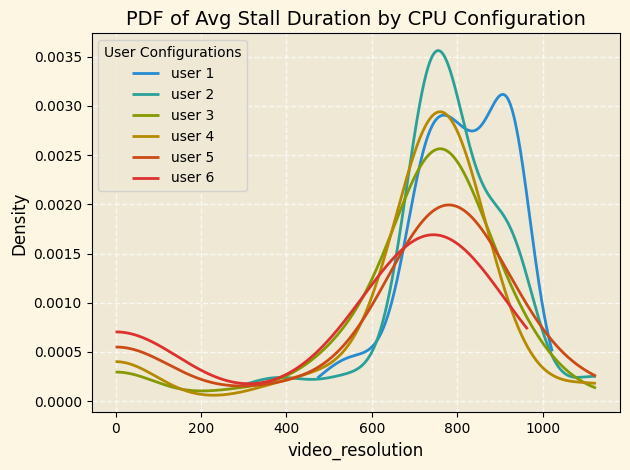

In [31]:
# Plot the KDE for each CPU configuration
metric = "video_resolution"
for user, group in atk0_qoe_metrics.groupby('user'):
    kde = gaussian_kde(group[metric])
    x_values = np.linspace(group[metric].min(), group[metric].max(), 1000)
    plt.plot(x_values, kde(x_values), label=f"user {user}", linewidth=2)

# Add labels, legend, and title
plt.title("PDF of Avg Stall Duration by CPU Configuration", fontsize=14)
plt.xlabel(f"{metric}", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="User Configurations", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Per User and CPU

Error from:  1 4.0
Error from:  1 5.0
Error from:  1 5.5
Error from:  2 4.0
Error from:  3 0.5
Error from:  4 0.5
Error from:  5 0.5
Error from:  6 0.5
Error from:  6 1.0


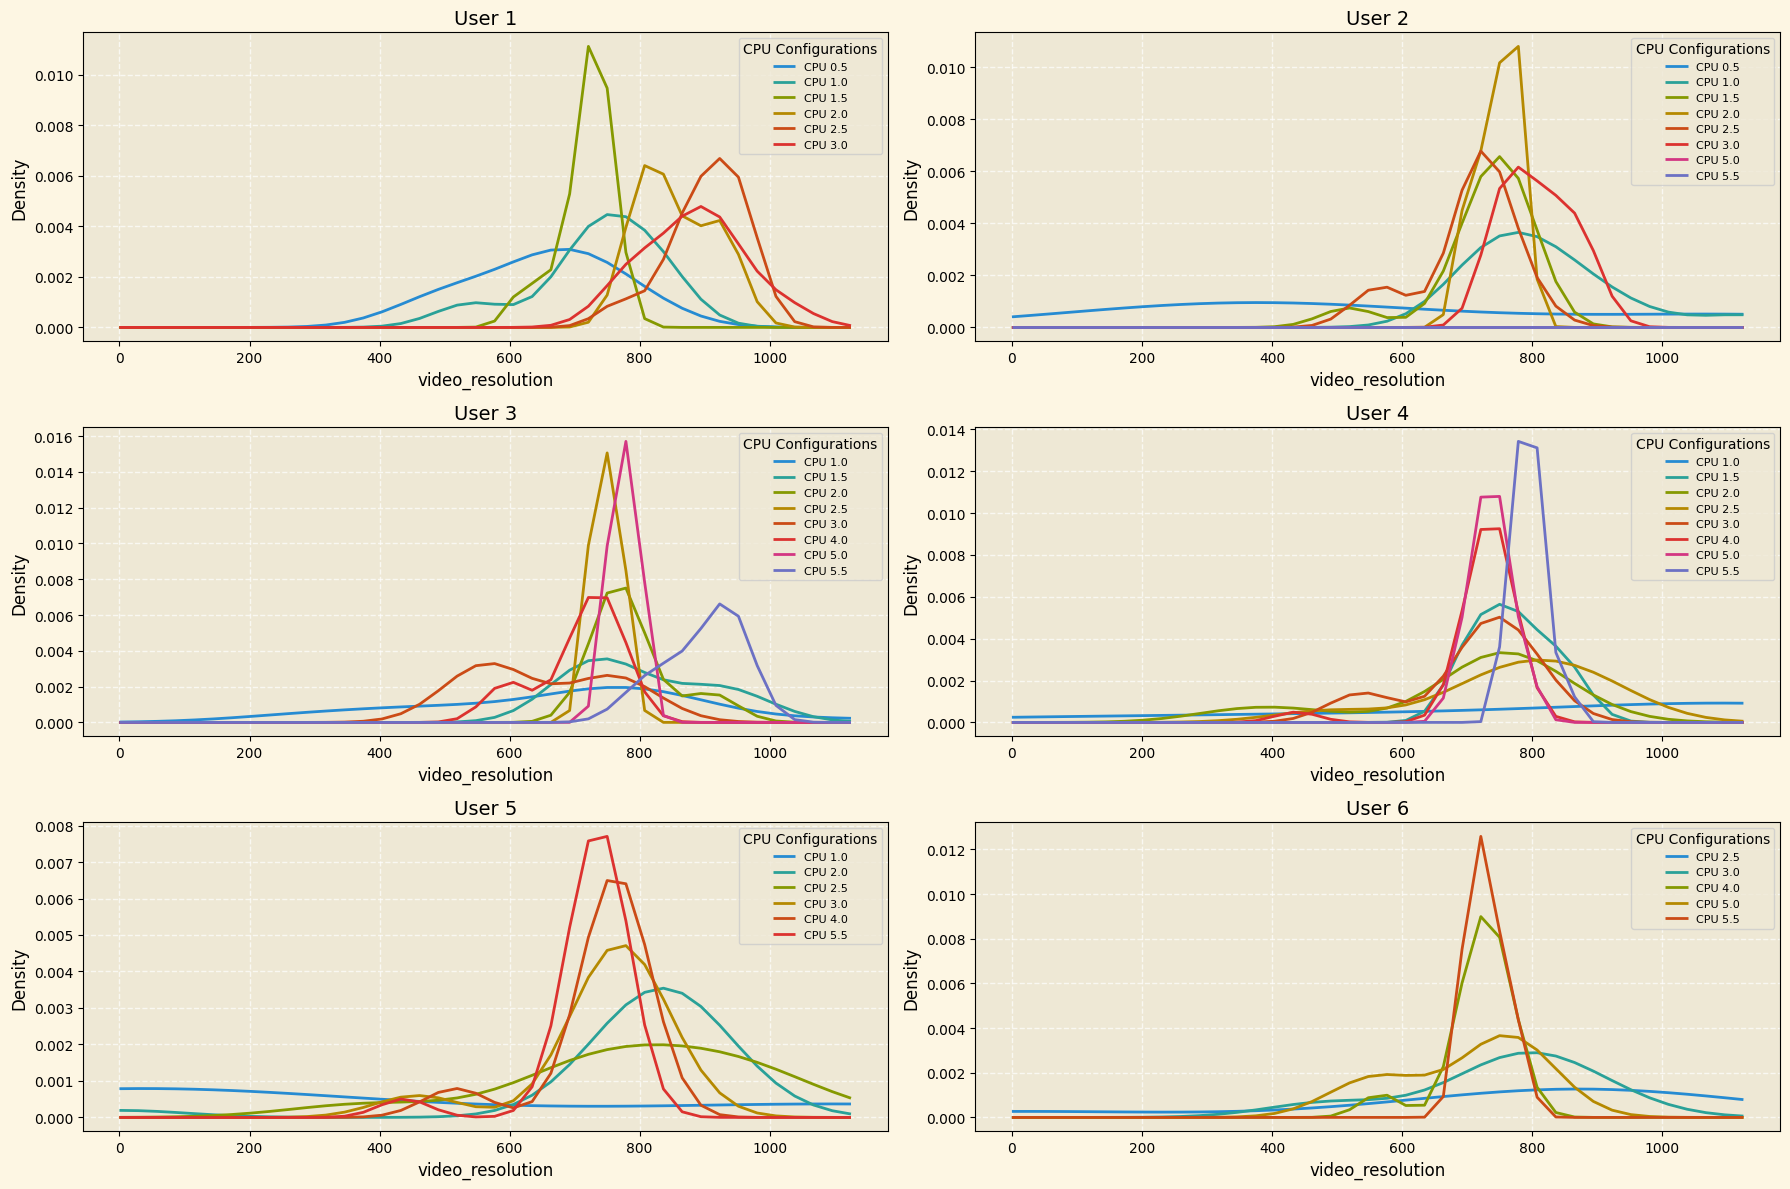

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np


# Target metric
metric = "video_resolution"

# Get unique users
unique_users = atk0_qoe_metrics['user'].unique()

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each user's data in a subplot
for i, user in enumerate(unique_users):
    if i >= len(axes):  # Skip if more users than subplots
        break

    ax = axes[i]
    user_group = atk0_qoe_metrics[atk0_qoe_metrics['user'] == user]
    for cpu, cpu_group in user_group.groupby('cpu'):
        try:
            kde = gaussian_kde(cpu_group[metric])
            # x_values = np.linspace(0,150000, 40)
            x_values = np.linspace(0,1125, 40)
            ax.plot(x_values, kde(x_values), label=f"CPU {cpu}", linewidth=2)
        except:
            print("Error from: ", user, cpu)
    # Customize subplot
    ax.set_title(f"User {user}", fontsize=14)
    ax.set_xlabel(f"{metric}", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(title="CPU Configurations", fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if any
for j in range(len(unique_users), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()        

### Attack 2000

/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reind

Error from:  2 2.0
Error from:  3 0.5


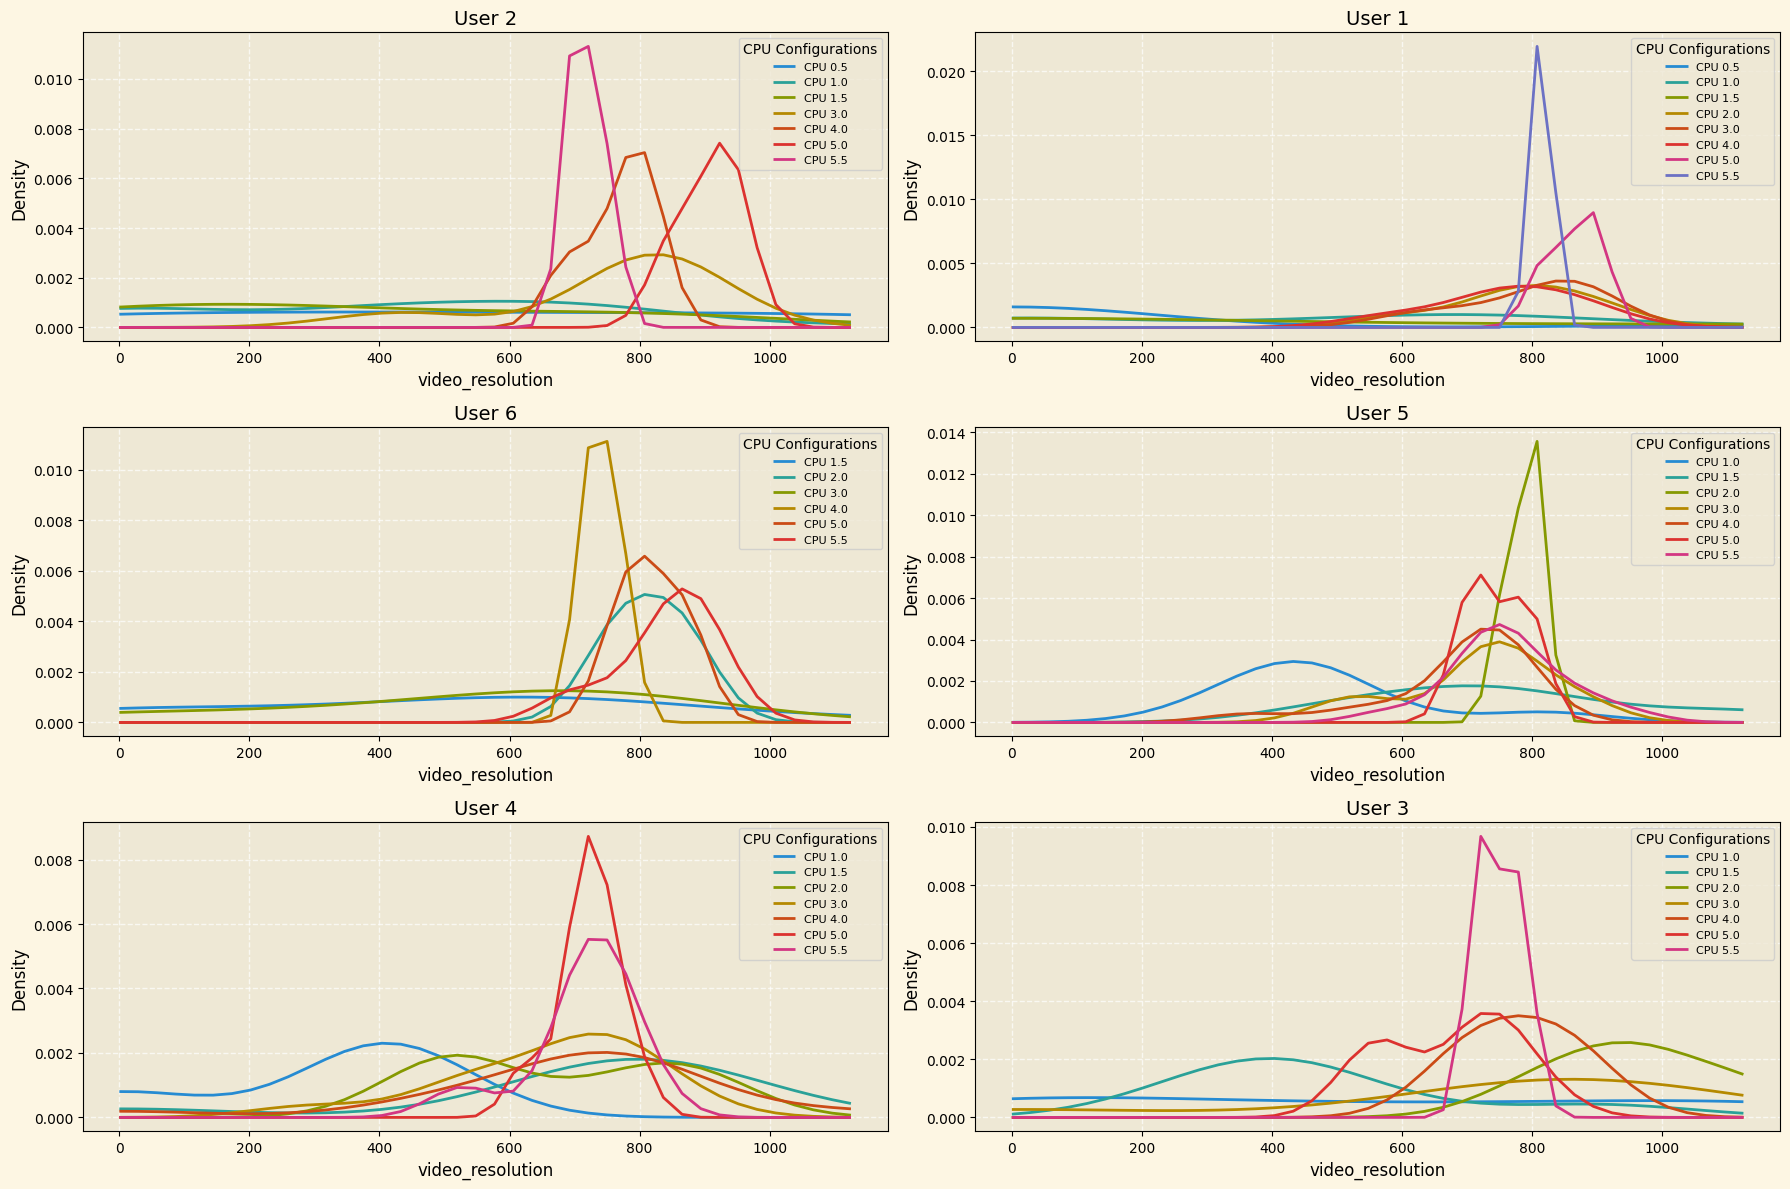

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np


# Target metric
metric = "video_resolution"

# Get unique users
unique_users = atk50_qoe_metrics['user'].unique()

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each user's data in a subplot
for i, user in enumerate(unique_users):
    if i >= len(axes):  # Skip if more users than subplots
        break

    ax = axes[i]
    user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
    for cpu, cpu_group in user_group.groupby('cpu'):
        try:
            kde = gaussian_kde(cpu_group[metric])
            # x_values = np.linspace(0,150000, 40)
            x_values = np.linspace(0,1125, 40)
            ax.plot(x_values, kde(x_values), label=f"CPU {cpu}", linewidth=2)
        except:
            print("Error from: ", user, cpu)
    # Customize subplot
    ax.set_title(f"User {user}", fontsize=14)
    ax.set_xlabel(f"{metric}", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(title="CPU Configurations", fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if any
for j in range(len(unique_users), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()        

### API Test

In [55]:
import requests
import pandas as pd
# Flask server URL
FLASK_SERVER_URL = "http://192.168.50.157:3050/query-prometheus"

QUERIES = {
    "CPU Usage": "sum(rate(container_cpu_usage_seconds_total{namespace='default'}[150s])) by (pod)",
    "CPU Limit": "sum(kube_pod_container_resource_limits{resource='cpu', namespace='default'}) by (pod)",
    "Memory Usage": "sum(rate(container_memory_usage_bytes{namespace='default', container!=''}[150s])) by (pod)",
    # "Memory Limit": "sum(kube_pod_container_resource_limits{resource='memory', namespace='default'}) by (pod)",
    "NW Throughput Transmit": "sum(rate(container_network_transmit_bytes_total{namespace='default'}[150s]))",
    "NW Throughput Receive": "sum(rate(container_network_receive_bytes_total{namespace='default'}[150s]))",
    "Packet Drops": "sum(rate(container_network_receive_packets_dropped_total{namespace='default'}[150s]))",
    # "Disk I/O Read": "sum(rate(node_disk_read_bytes_total{node='worker3'}[150s]))",
    # "Disk I/O Write": "sum(rate(node_disk_written_bytes_total{node='worker3'}[150s]))",
    # "Disk Usage": "sum(node_filesystem_avail_bytes{namespace='default'}) / sum(node_filesystem_size_bytes{namespace='default'})",
    "Evicted Pods": "rate(kube_pod_container_status_last_terminated_reason{reason='Evicted', namespace='default'}[150s])",
    "OOM Killed Pods": "rate(kube_pod_container_status_last_terminated_reason{reason='OOMKilled', namespace='default'}[150s])",
    "Number of Pods": "count(kube_pod_status_phase{phase='Running', namespace='default'})"
}

def query_metric(metric_name, query):
    """Query a specific metric from the Flask server."""
    try:
        response = requests.get(FLASK_SERVER_URL, params={"query": query})
        response.raise_for_status()  # Raise an HTTPError for bad responses
        data = response.json()
        # Parse Prometheus response
        results = []
        if data["status"] == "success" and "data" in data and "result" in data["data"]:
            print(data)
            for item in data["data"]["result"]:
                pod = item["metric"].get("pod", "N/A")
                value = item["value"][1]  # Extract the value
                results.append({"Metric": metric_name, "Pod": pod, "Value": float(value)})
        else:
            print("Unable to obtain, ", metric_name)
        return results
    except requests.exceptions.RequestException as e:
        print(f"Error querying {metric_name}: {e}")
        return []

def main():
    """Fetch metrics and store them in a DataFrame."""
    all_results = []
    for metric_name, query in QUERIES.items():
        metric_results = query_metric(metric_name, query)
        all_results.extend(metric_results)
    
    # Create a DataFrame
    df = pd.DataFrame(all_results)
    
    return df

df = main()

{'data': {'result': [], 'resultType': 'vector'}, 'status': 'success'}
{'data': {'result': [{'metric': {'pod': 'hls-ls-deployment-5c48859555-6wfhc'}, 'value': [1733396494.58, '1']}], 'resultType': 'vector'}, 'status': 'success'}
{'data': {'result': [], 'resultType': 'vector'}, 'status': 'success'}
{'data': {'result': [{'metric': {'pod': 'hls-ls-deployment-5c48859555-6wfhc'}, 'value': [1733396494.61, '4294967296']}], 'resultType': 'vector'}, 'status': 'success'}
{'data': {'result': [], 'resultType': 'vector'}, 'status': 'success'}
{'data': {'result': [], 'resultType': 'vector'}, 'status': 'success'}
{'data': {'result': [], 'resultType': 'vector'}, 'status': 'success'}
{'data': {'result': [], 'resultType': 'vector'}, 'status': 'success'}
{'data': {'result': [], 'resultType': 'vector'}, 'status': 'success'}
{'data': {'result': [{'metric': {}, 'value': [1733396494.699, '1']}], 'resultType': 'vector'}, 'status': 'success'}


In [56]:
df

,Metric,Pod,Value
0,CPU Limit,hls-ls-deployment-5c48859555-6wfhc,1.000000e+00
1,Memory Limit,hls-ls-deployment-5c48859555-6wfhc,4.294967e+09
2,Number of Pods,N/A,1.000000e+00
